In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Our Data

In [2]:
def by_year_summed(name):
    basic = pd.read_csv(name)
    basic['sum'] = basic.iloc[:, 2:].sum(axis=1)
    basic = basic[['month', 'year', 'sum']]
    yearly = basic[['year', 'sum']].groupby('year').sum()
    return yearly

Text(0.5,1,'titles, unnormalized')

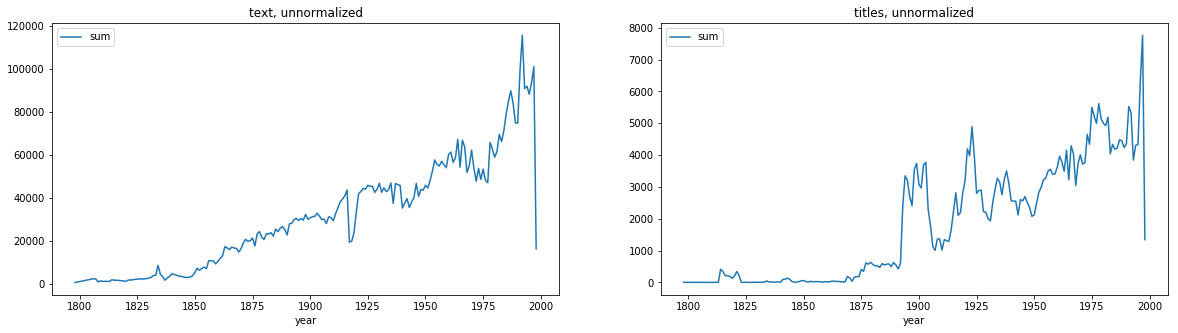

In [3]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
text_unnorm = by_year_summed('countries-text.csv')
titles_unnorm = by_year_summed('countries-titles.csv')
text_unnorm.plot(ax=ax1)
ax1.set_title('text, unnormalized')
titles_unnorm.plot(ax=ax2)
ax2.set_title('titles, unnormalized')

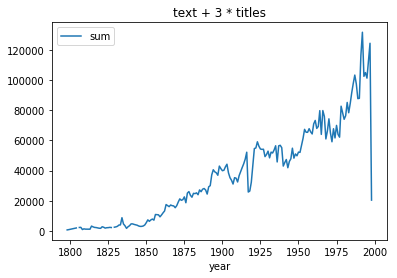

In [4]:
text_3titles_unnormalized = (text_unnorm + 3*titles_unnorm)
text_3titles_unnormalized.plot(title='text + 3 * titles')

Text(0.5,1,'titles, normalized')

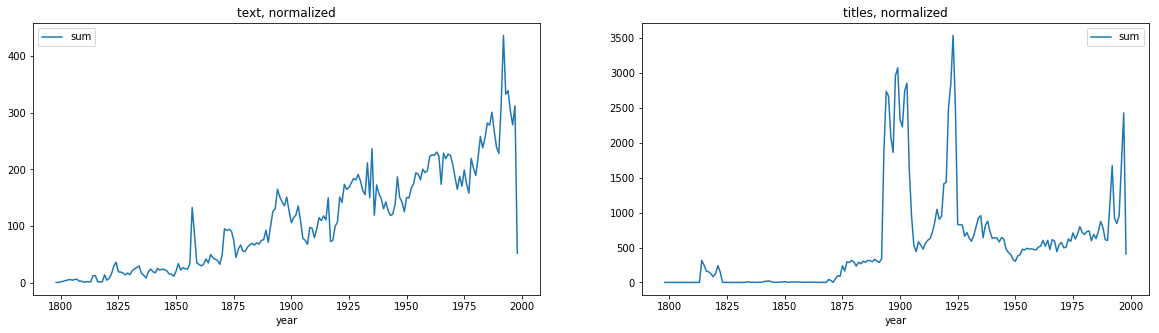

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
text_norm = by_year_summed('countries-text-normalized.csv')
titles_norm = by_year_summed('countries-titles-normalized.csv')
text_norm.plot(ax=ax1)
ax1.set_title('text, normalized')
titles_norm.plot(ax=ax2)
ax2.set_title('titles, normalized')

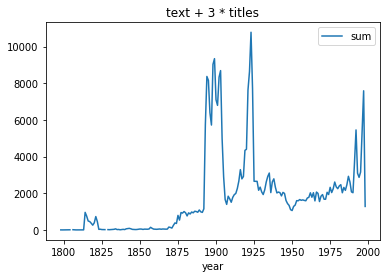

In [6]:
text_3titles_normalized = (text_norm + 3*titles_norm)
text_3titles_normalized.plot(title='text + 3 * titles')

# KOF Data

In [8]:
all_kof = pd.read_excel('KOF_data.xlsx')

In [9]:
swiss_kof = all_kof.iloc[:, :6] # Retain only global, de facto, de jure
swiss_kof = swiss_kof[swiss_kof.country == 'Switzerland'] # Retain only Swiss data
swiss_kof = swiss_kof.iloc[:, 2:] # Retain only year and indices
swiss_kof = swiss_kof.set_index('year') # Index by year

In [10]:
swiss_kof.head()

,KOFGI,KOFGIdf,KOFGIdj
year,,,
1970,72.391129,69.312744,75.469505
1971,72.636917,69.295120,75.978706
1972,73.103912,69.322426,76.885391
1973,74.531502,71.567291,77.495720
1974,74.892609,71.568558,78.216675


# Compare the two

In [19]:
def join_indices(our_index, their_index):
    # INDEX of BOTH must be the year
    # Both arguments are DF with only one column
    
    # Study the correct time range
    our_index   = our_index.loc[our_index.index >= 1970]
    our_index   = our_index.loc[our_index.index < 1998]
    their_index = their_index.loc[their_index.index >= 1970]
    their_index = their_index.loc[their_index.index < 1998]
    
    # Bring all values in % (val - min) / (max - min)
    our_index_scaled = (our_index - our_index.min()) / (our_index.max() - our_index.min()) * 100
    their_index_scaled = (their_index - their_index.min()) / (their_index.max() - their_index.min()) * 100
    
    # Join and return
    return our_index_scaled.join(their_index_scaled, how='inner')

In [12]:
our_index = text_3titles_unnormalized
their_index = their_index[['KOFGI']]

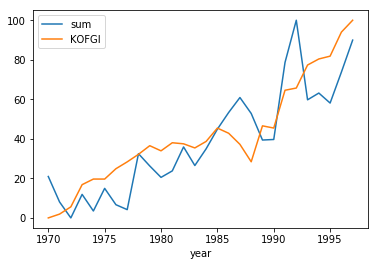

In [21]:
join_indices(text_3titles_unnormalized, swiss_kof[['KOFGI']]).plot()